# Lab 7- Data Analysis

Exercises 1-4 are to be completed by Match 29th. The remaider of the lab is due April 5th. Before leaving lab today, everyone must download the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf).

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms.

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY).

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS:
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [1]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  70.2M      0 --:--:--  0:00:12 --:--:-- 83.1M


In [8]:
!gunzip SUSY.csv.gz

In [2]:
ls -lh

total 880M
drwxr-xr-x 1 root root 4.0K Oct 29 13:25 sample_data/
-rw-r--r-- 1 root root 880M Oct 31 14:41 SUSY.csv.gz


The data is provided as a comma separated file.

In [10]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

In [11]:
### Reducing the dataset

!ls -lh

total 2.3G
drwxr-xr-x 1 root root 4.0K Oct 29 13:25 sample_data
-rw-r--r-- 1 root root 2.3G Oct 31 14:41 SUSY.csv
-rw-r--r-- 1 root root    0 Oct 31 14:41 SUSY-small.csv


In [12]:
## How many datapoints in SUZY

!wc -l SUSY.csv

5000000 SUSY.csv


In [13]:
!head -500000 SUSY.csv > SUSY-small.csv

In [14]:
ls -lh

total 2.5G
drwxr-xr-x 1 root root 4.0K Oct 29 13:25 sample_data/
-rw-r--r-- 1 root root 2.3G Oct 31 14:41 SUSY.csv
-rw-r--r-- 1 root root 228M Oct 31 14:42 SUSY-small.csv


### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [15]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [16]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [17]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [18]:
FeatureNames

['S_R',
 'MT2',
 'M_Delta_R',
 'dPhi_r_b',
 'cos_theta_r1',
 'axial_MET',
 'R',
 'MET_rel',
 'M_TR_2',
 'M_R']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [20]:
filename = "SUSY-small.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [21]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0.0,0.719035,1.091879,0.291540,1.205962,-1.599117,-1.139445,0.424546,1.154849,0.637185,-0.091178,1.972156,0.697028,0.313636,0.988602,1.981573,0.744828,1.095080,0.006546
499996,1.0,0.910016,-0.364544,-0.777120,0.543648,-0.910632,-1.723707,2.864673,1.458272,2.176558,-0.590911,0.673695,1.662140,2.189362,1.195041,0.910815,1.181893,1.252362,0.826035
499997,1.0,0.842954,0.332476,-1.048564,1.347989,0.320496,-0.666358,0.450433,-0.411872,0.293407,0.630491,0.859920,0.403371,0.416258,0.591989,0.372003,0.716788,0.366991,0.265798
499998,0.0,1.370760,-1.162912,0.893499,2.118091,1.248496,-0.887211,0.164659,0.316840,0.215165,0.280418,3.087083,0.526929,0.151467,0.308067,3.098183,0.233042,0.876216,0.000593


The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [22]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


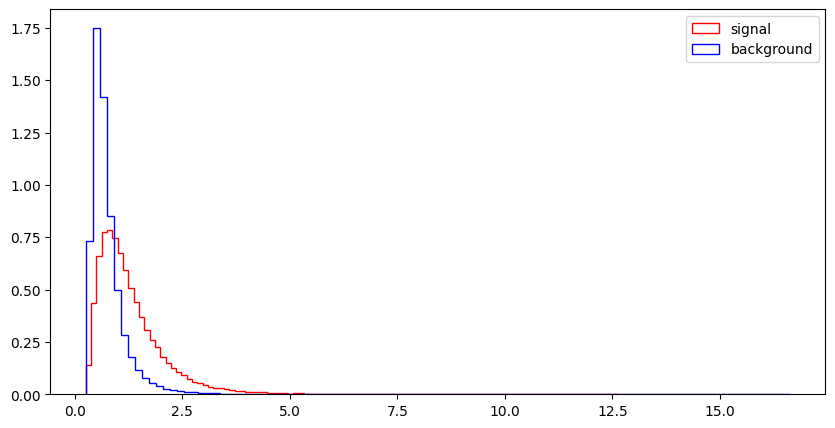

l_1_eta


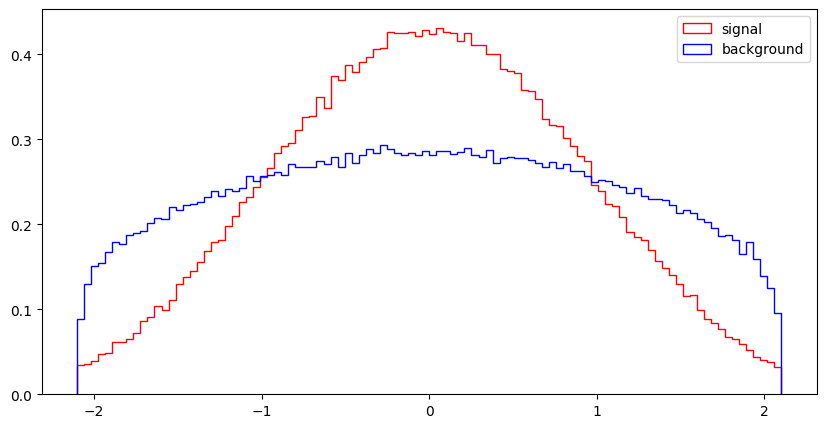

l_1_phi


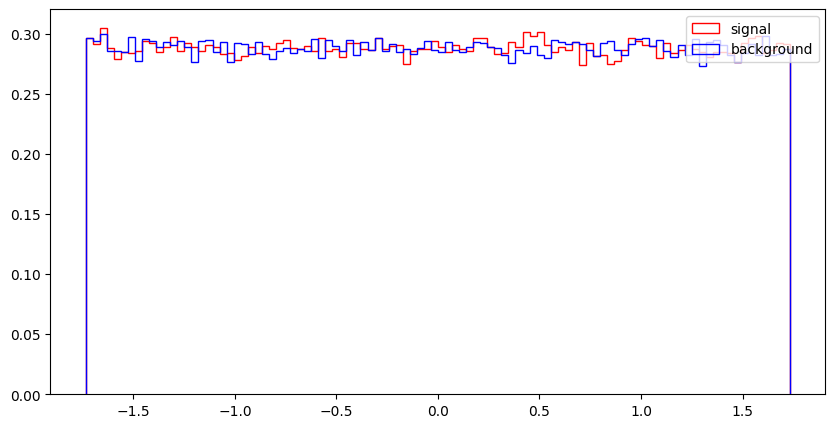

l_2_pT


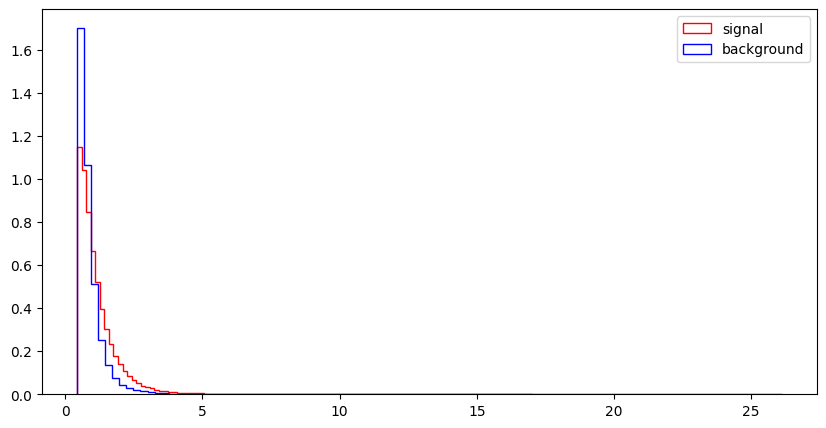

l_2_eta


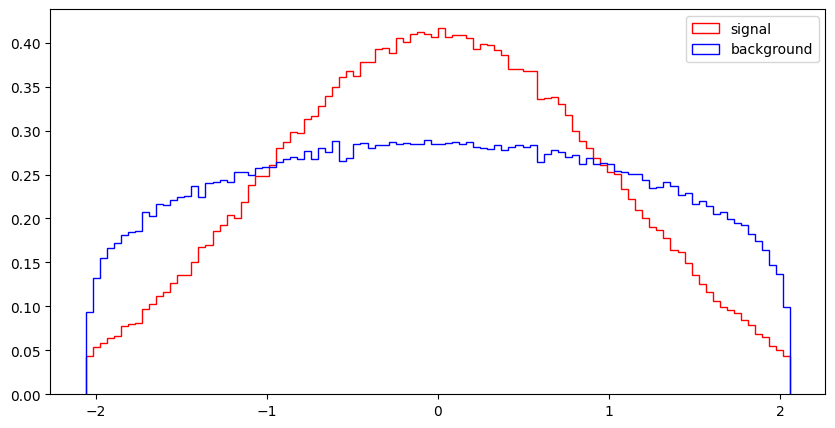

l_2_phi


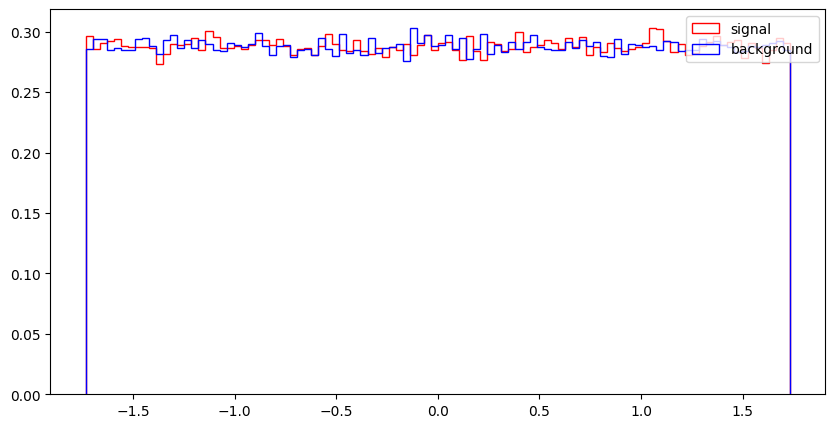

MET


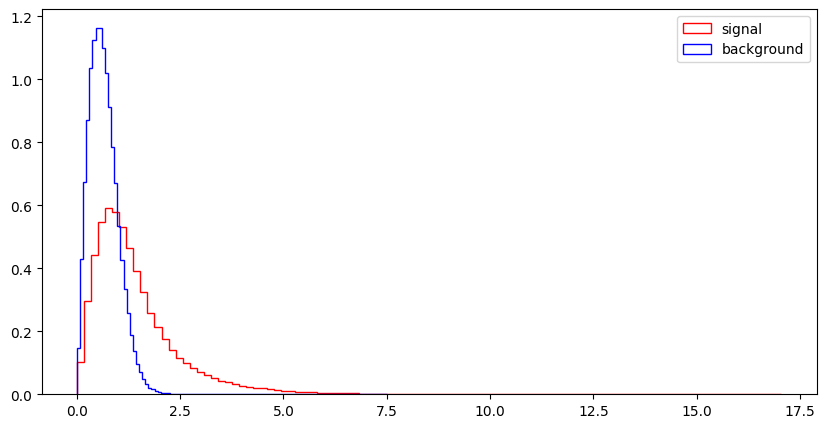

MET_phi


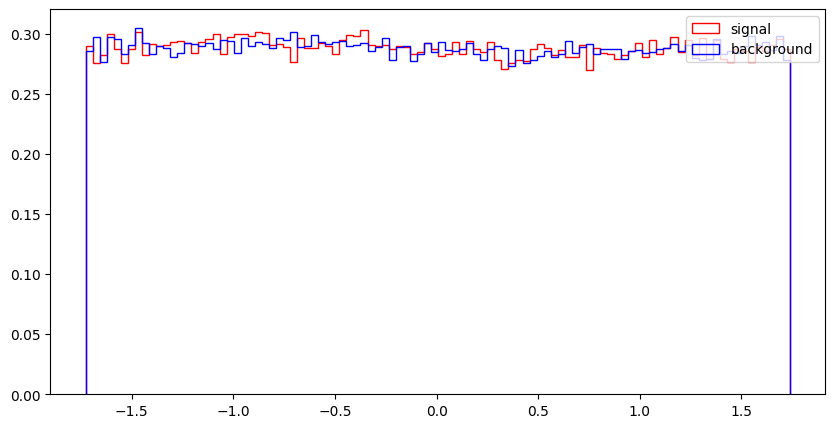

MET_rel


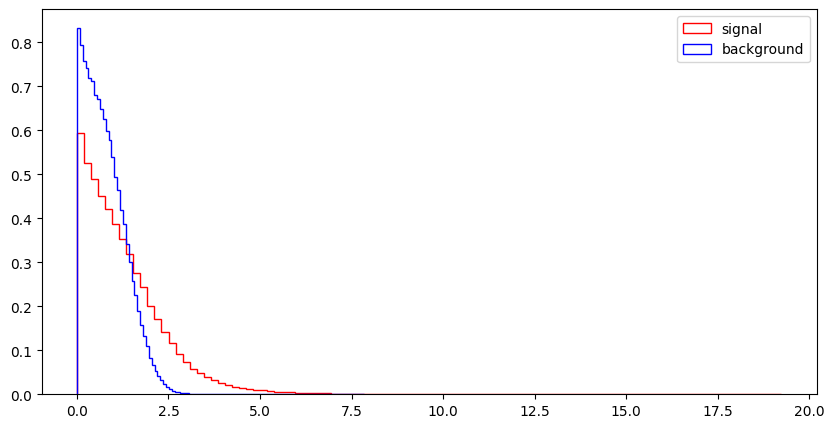

axial_MET


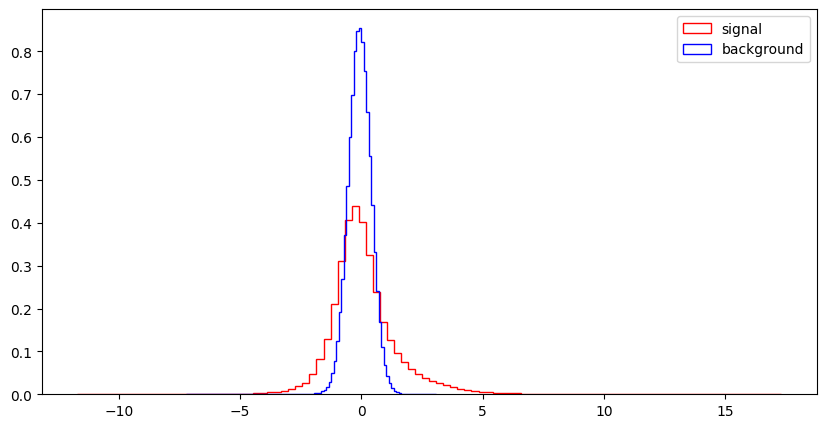

M_R


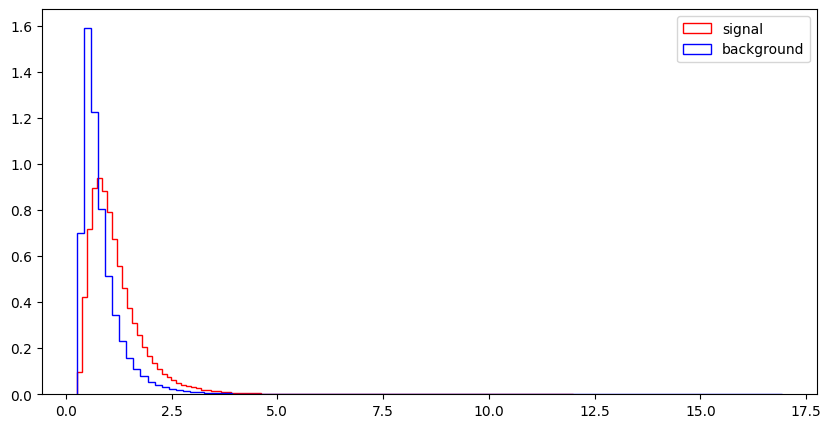

M_TR_2


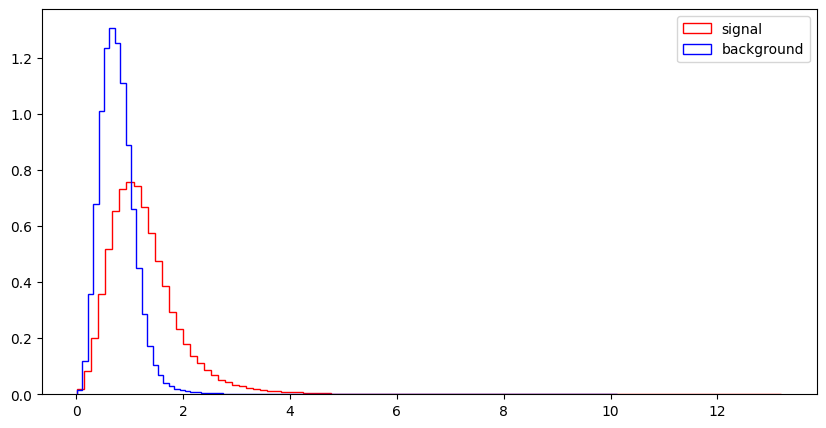

R


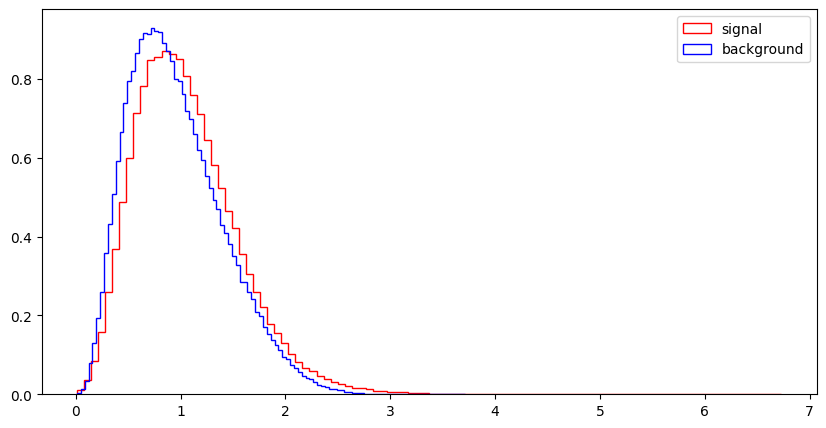

MT2


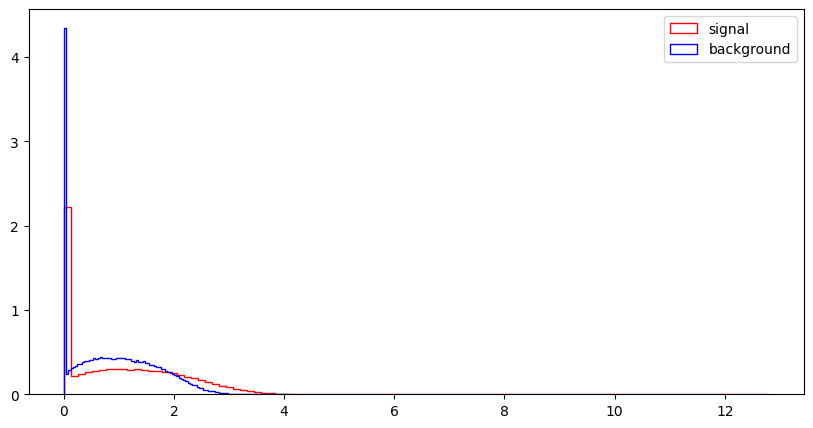

S_R


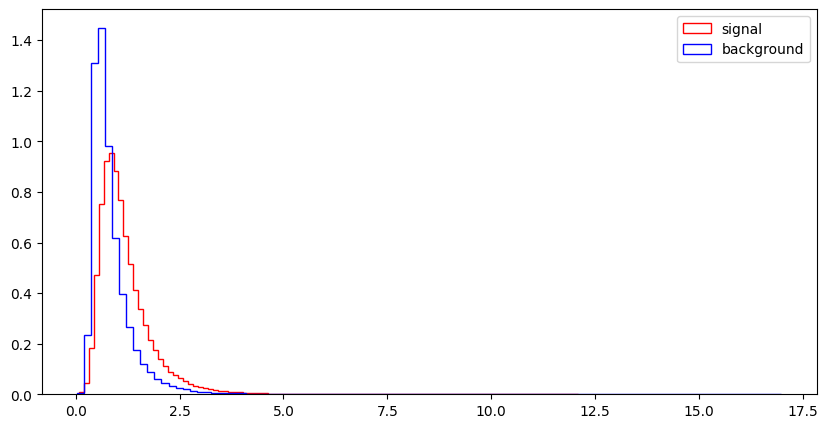

M_Delta_R


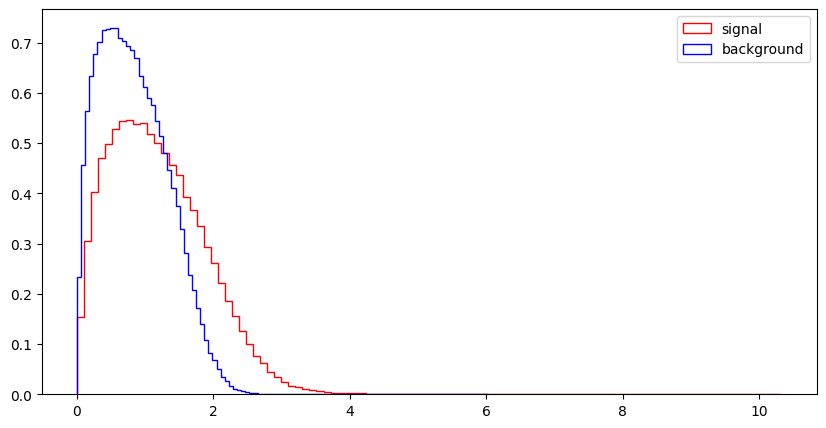

dPhi_r_b


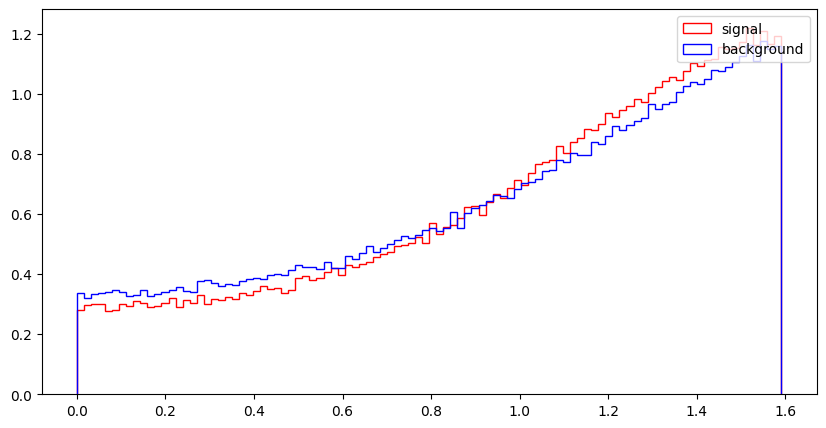

cos_theta_r1


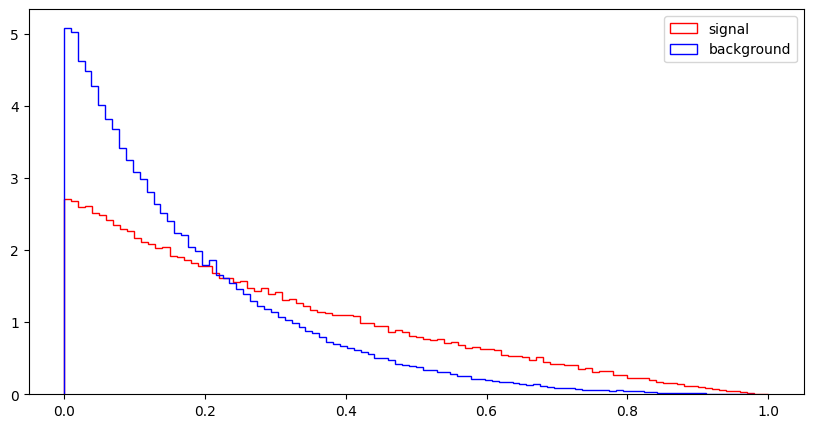

In [23]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

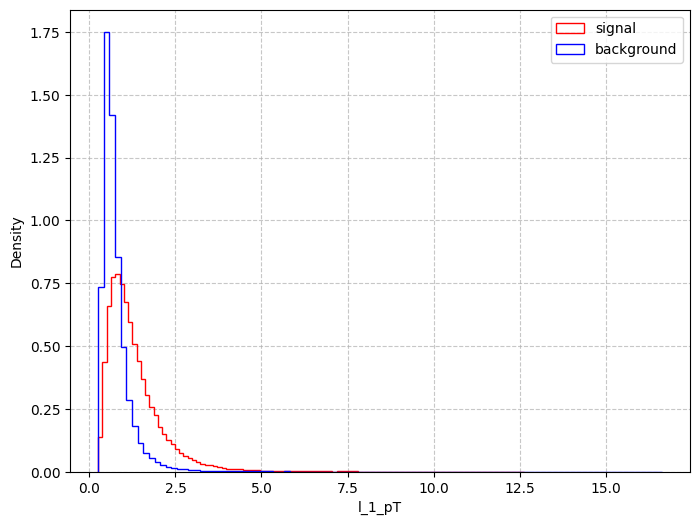

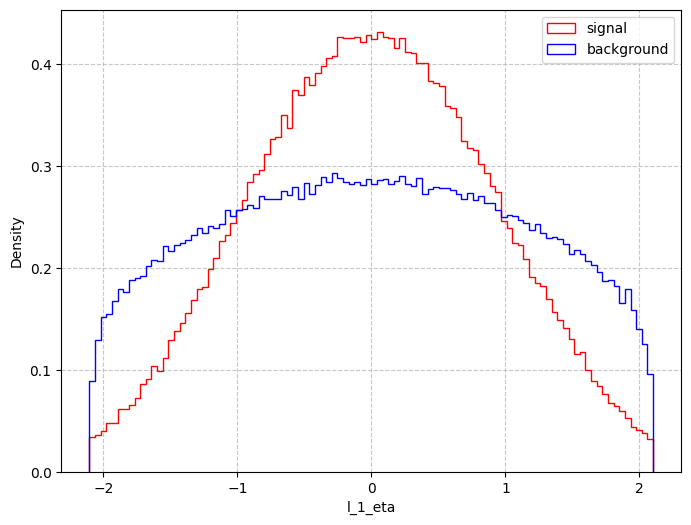

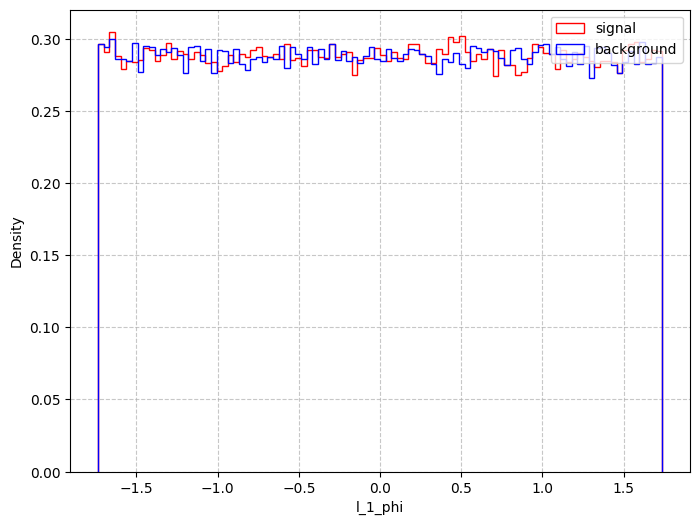

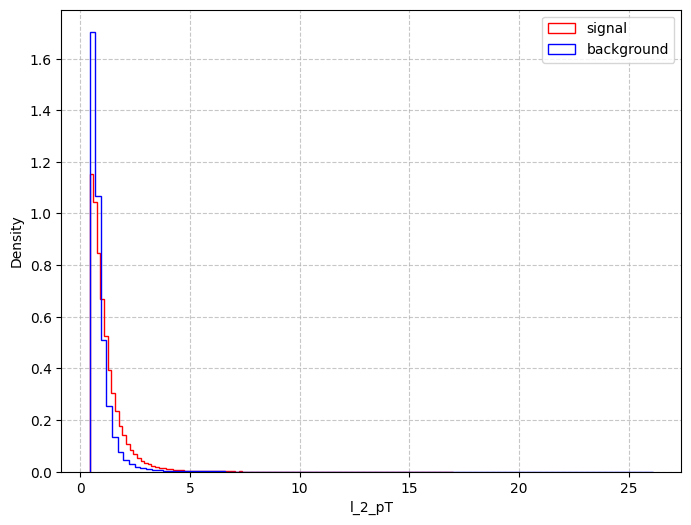

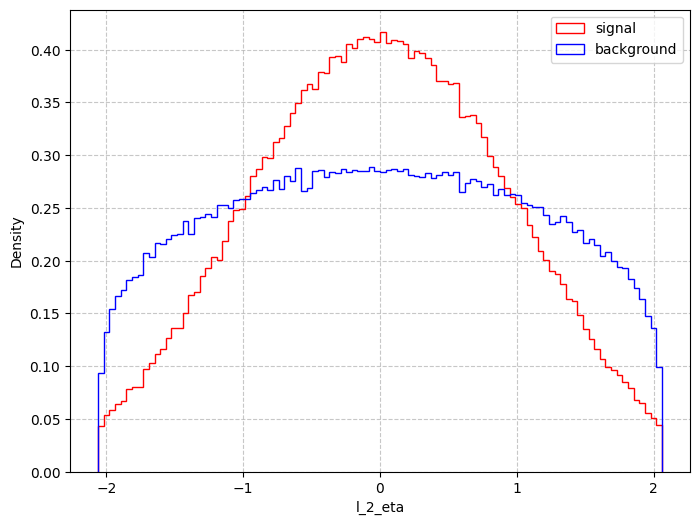

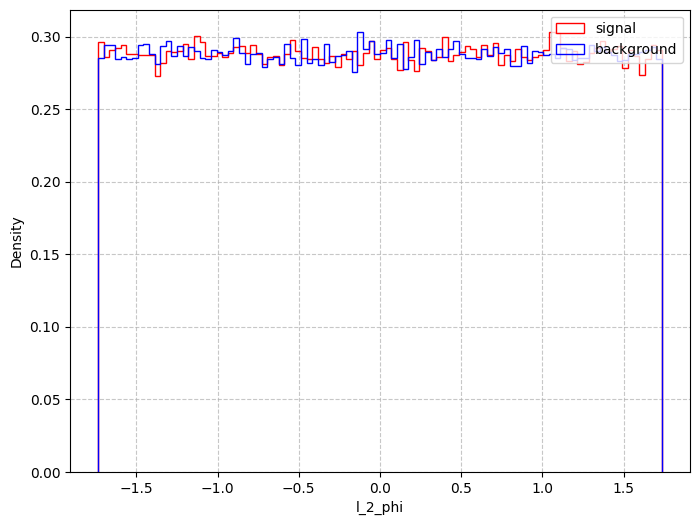

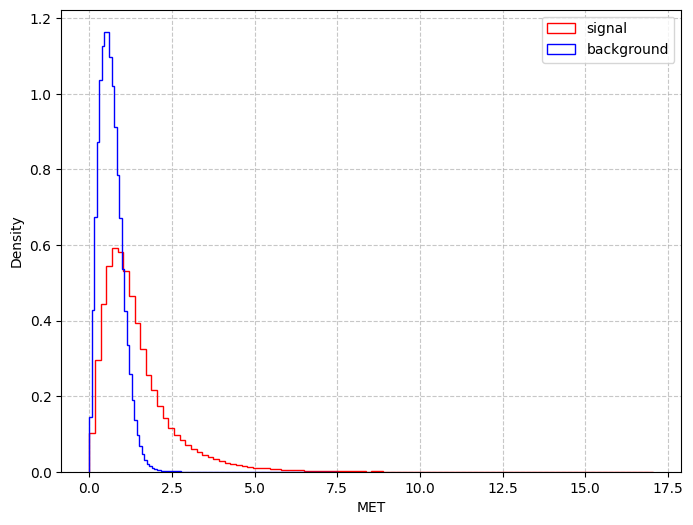

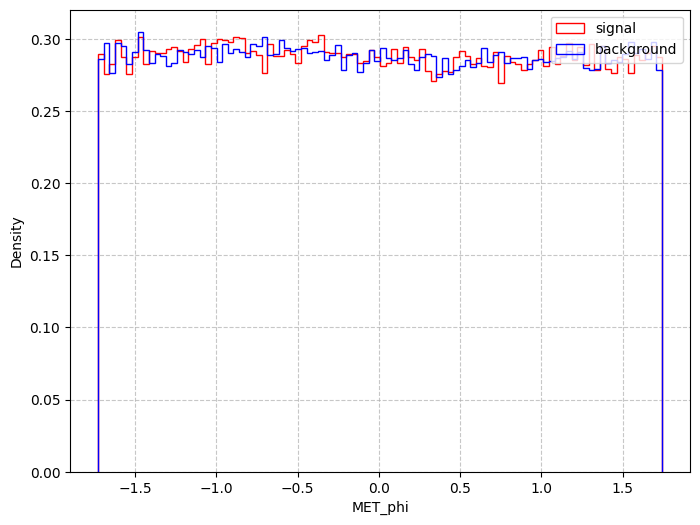

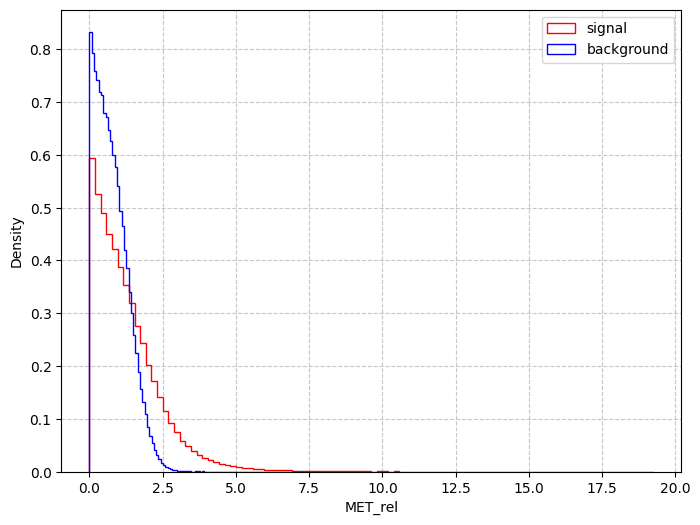

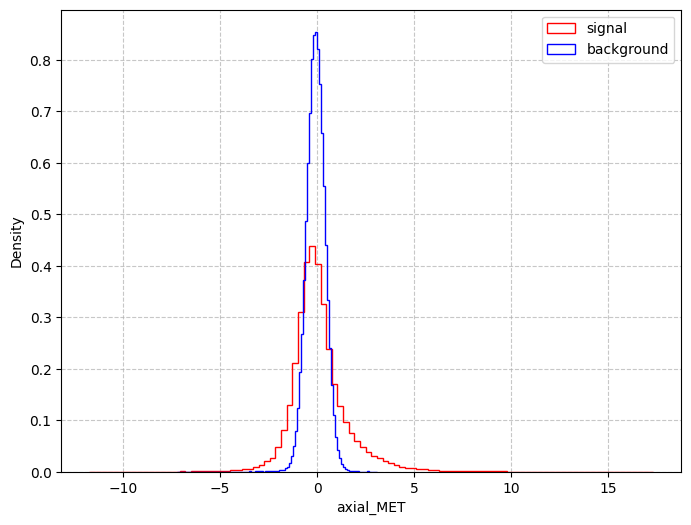

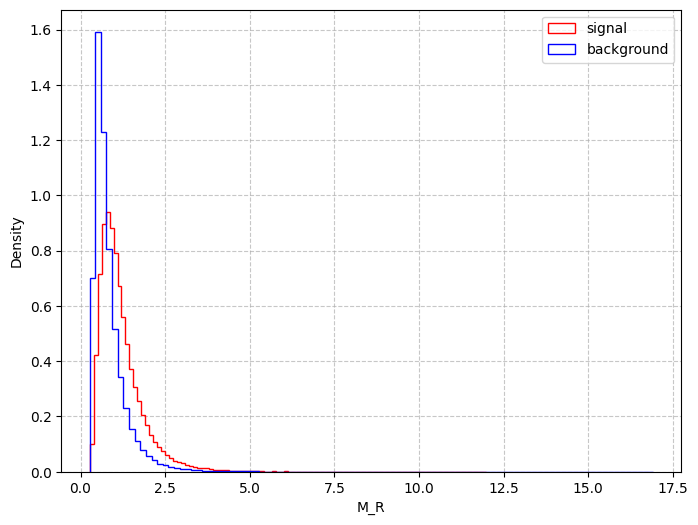

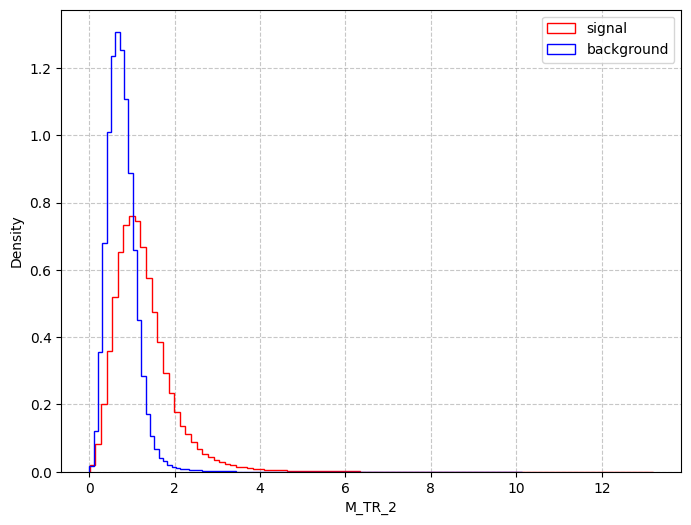

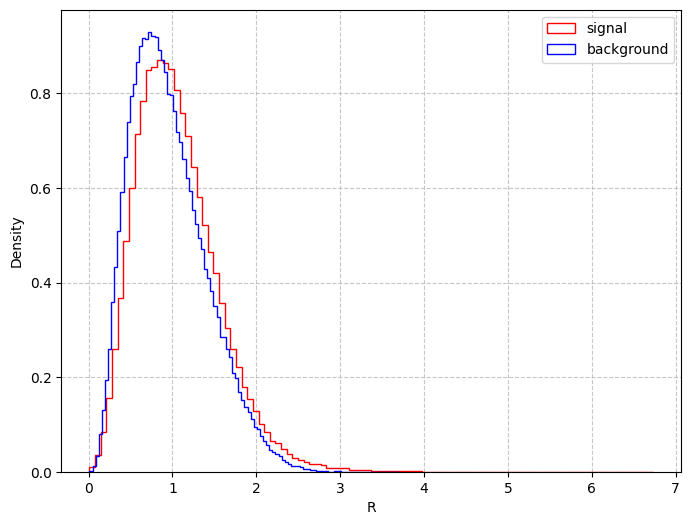

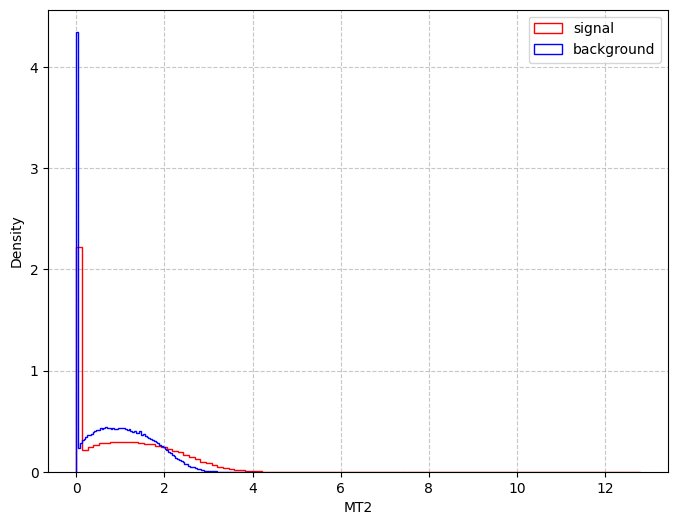

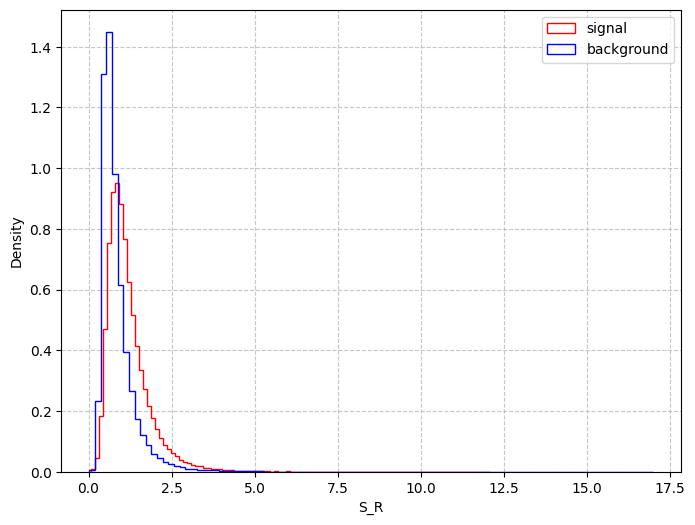

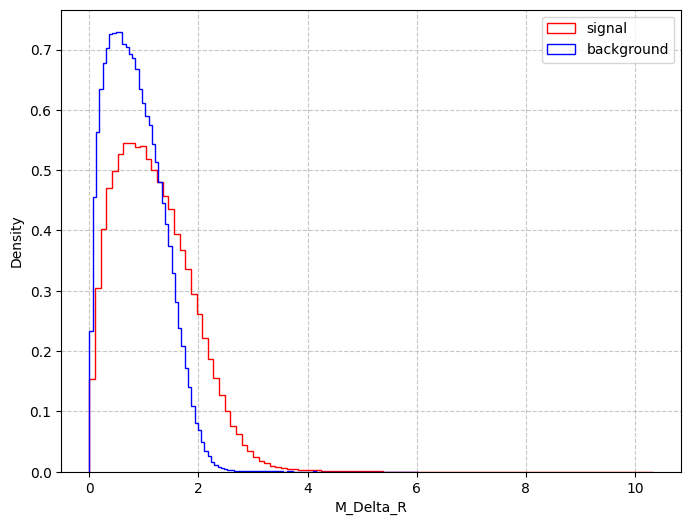

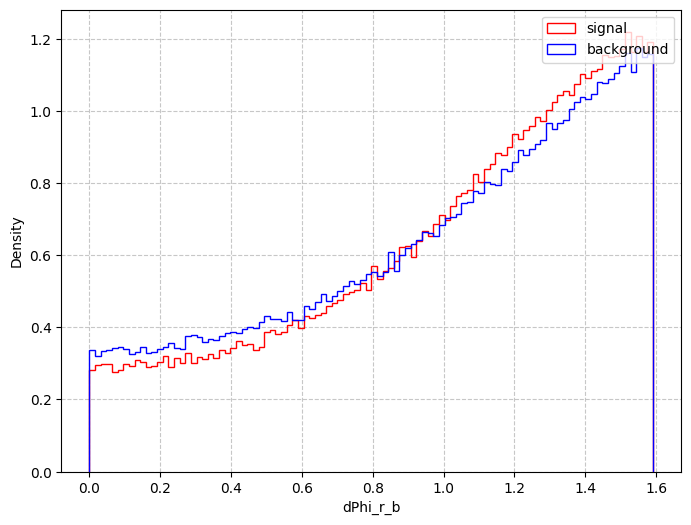

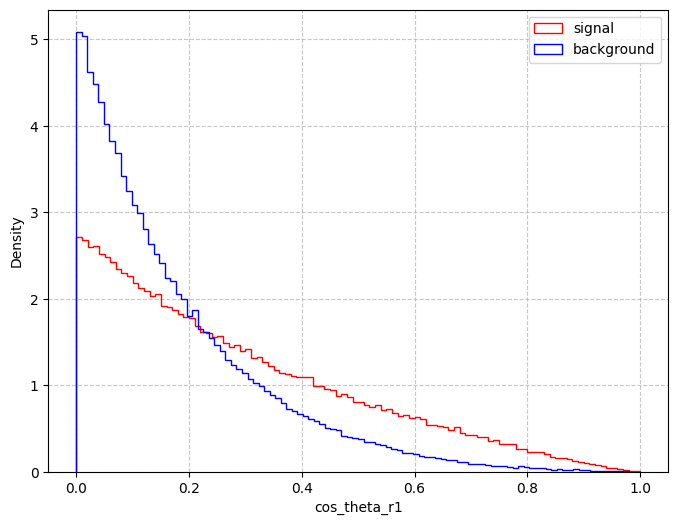

In [24]:
# Loops through each feature variable and then plots the histograms
for var in VarNames[1:]:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    plt.hist(np.array(df_sig[var]), bins=100, histtype="step", color="red", label="signal", density=True)
    plt.hist(np.array(df_bkg[var]), bins=100, histtype="step", color="blue", label="background", density=True)

    # Add labels, legend, and grid to the visuals
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.legend(loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.show()

## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY and Higgs samples, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

In [25]:
## Part A

def compare_pair_plots(df_susy, df_higgs, columns, selection_dict, low_level=True):
    # Determine title based on feature level
    title = 'Pair Plots - Low Level Features' if low_level else 'Pair Plots - High Level Features'

    # Create a new figure
    plt.figure(figsize=(15, 15))
    n = len(columns)

    # Iterate over pairs of variables
    for i, x in enumerate(columns):
        for j, y in enumerate(columns):
            plt.subplot(n, n, i * n + j + 1)  # Position subplot
            make_legend = (i == 0) and (j == 0)  # Decide whether to make legend
            plot_data(df_susy, x, y, selection_dict, 'SUSY', make_legend)  # Plot SUSY data
            plot_data(df_higgs, x, y, selection_dict, 'Higgs', False)  # Plot Higgs data

    plt.suptitle(title, fontsize=16)  # Set title
    plt.tight_layout()  # Adjust layout
    plt.show()  # Show plot

def plot_data(df, x_var, y_var, selection_dict, label, make_legend):
    selected_data = df.query(selection_dict)  # Filter data
    if x_var == y_var:  # Plot histogram if x and y are same
        plt.hist(selected_data[x_var], alpha=0.5, density=True, bins=50, label=label if make_legend else None)
    else:  # Plot scatter plot otherwise
        plt.scatter(selected_data[x_var], selected_data[y_var], label=label if make_legend else None)
    if make_legend:  # Add legend if required
        plt.legend()

In [ ]:
# Example usage:(Cannot locate the higgs to compare)


#compare_pair_plots(df_susy, df_higgs, columns, selection_dict, low_level=True)

In [ ]:
### Part B

In [26]:
def compare_pair_plots(df_susy, df_higgs, columns, selection_dict, low_level=True):
    # Determine title based on feature level
    title = 'Pair Plots - Low Level Features' if low_level else 'Pair Plots - High Level Features'

    # Create a new figure
    plt.figure(figsize=(15, 15))
    n_columns = len(columns)

    # Calculate histograms for each variable in SUSY and Higgs datasets
    susy_histograms = {var: np.histogram(df_susy.query(selection_dict)[var], bins=50, density=True) for var in columns}
    higgs_histograms = {var: np.histogram(df_higgs.query(selection_dict)[var], bins=50, density=True) for var in columns}

    # Loop through each pair of variables
    for i, x_var in enumerate(columns):
        for j, y_var in enumerate(columns):
            # Set up subplot
            plt.subplot(n_columns, n_columns, i * n_columns + j + 1)

            # Decide whether to make legend for the first subplot
            make_legend = (i == 0) and (j == 0)

            # Plot histograms for SUSY and Higgs datasets
            plot_histogram(susy_histograms[x_var], 'SUSY', make_legend)
            plot_histogram(higgs_histograms[x_var], 'Higgs', False)

    # Add title and adjust layout
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

def plot_histogram(histogram, label, make_legend):
    # Plot histogram as filled area
    plt.fill_between(histogram[1][:-1], histogram[0], alpha=0.5, label=label if make_legend else None, color='blue')

    # Add legend for the first subplot
    if make_legend:
        plt.legend()

# Example usage:
# compare_pair_plots(df_susy, df_higgs, columns, selection_dict, low_level=True)

In [ ]:
## Using numpy to have the histograms already calculated would avoid using the loops so it'll form the pair plots faster.

In [ ]:
## Part C:
# It's good to look for which class might dominate over another one in certain places. For scatterplots, looking at patterns whether it be closely formed in clusters or the opposite. Also like the figures made in the previous exercises with different peak heights or shapes.

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate).

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

Hint: Example code for embedding a `tabulate` table into a notebook:

In [27]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

X,Y,Z
A,1,2
C,3,4
D,5,6


In [28]:
import numpy as np
from tabulate import tabulate

# Function to compute covariance and correlation matrices
def compute_matrices(df):
    covariance_matrix = np.cov(df, rowvar=False)
    correlation_matrix = np.corrcoef(df, rowvar=False)
    return covariance_matrix, correlation_matrix

# Function to format matrices for display
def format_matrix(matrix):
    return [["{:.3f}".format(value) for value in row] for row in matrix]

# Function to display matrices using tabulate
def display_matrix(matrix, headers):
    formatted_matrix = format_matrix(matrix)
    table = tabulate(formatted_matrix, headers=headers)
    print(table)

# Function to analyze dataset
def analyze_dataset(dataset, feature_names=None):
    if feature_names is None:
        feature_names = ["Feature " + str(i) for i in range(dataset.shape[1])]

    low_level_features = dataset[:, :5]
    high_level_features = dataset[:, 5:]

    covariance_low, correlation_low = compute_matrices(low_level_features)
    covariance_high, correlation_high = compute_matrices(high_level_features)

    print("Low-Level Features Analysis:")
    display_matrix(covariance_low, feature_names[:5])
    display_matrix(correlation_low, feature_names[:5])

    print("\nHigh-Level Features Analysis:")
    display_matrix(covariance_high, feature_names[5:])
    display_matrix(correlation_high, feature_names[5:])

In [29]:
# checking if it works:
dataset = np.random.rand(100, 10)  # Example dataset with 100 samples and 10 features
analyze_dataset(dataset)

Low-Level Features Analysis:
  Feature 0    Feature 1    Feature 2    Feature 3    Feature 4
-----------  -----------  -----------  -----------  -----------
      0.077       -0.004       -0.003       -0.01        -0
     -0.004        0.09        -0.018        0.007       -0.018
     -0.003       -0.018        0.076        0.013       -0.01
     -0.01         0.007        0.013        0.095        0.014
     -0           -0.018       -0.01         0.014        0.075
  Feature 0    Feature 1    Feature 2    Feature 3    Feature 4
-----------  -----------  -----------  -----------  -----------
      1           -0.052       -0.041       -0.112       -0.006
     -0.052        1           -0.213        0.072       -0.22
     -0.041       -0.213        1            0.155       -0.126
     -0.112        0.072        0.155        1            0.16
     -0.006       -0.22        -0.126        0.16         1

High-Level Features Analysis:
  Feature 5    Feature 6    Feature 7    Feature 8    F

## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal:

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable.

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

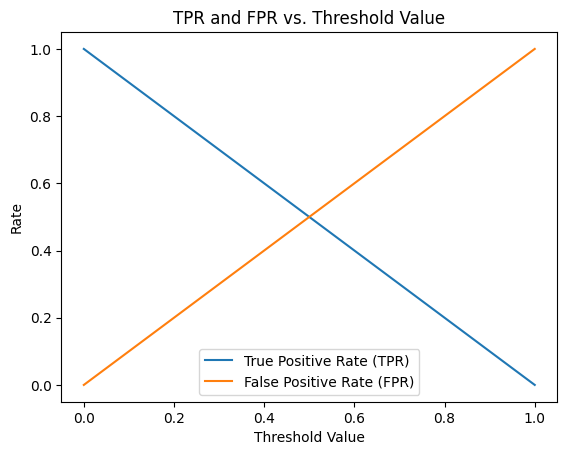

In [30]:
# Define expected number of signal and background events
n_sig_expected = 1000
n_bkg_expected = 10000

# Define threshold values
threshold_values = np.linspace(0, 1, 100)  # Adjust range and number of points as needed

# Calculate TPR and FPR for each threshold value
tpr_values = [(1 - threshold) for threshold in threshold_values]
fpr_values = [threshold for threshold in threshold_values]

# Plot TPR and FPR as functions of the threshold value
plt.plot(threshold_values, tpr_values, label='True Positive Rate (TPR)')
plt.plot(threshold_values, fpr_values, label='False Positive Rate (FPR)')
plt.xlabel('Threshold Value')
plt.ylabel('Rate')
plt.title('TPR and FPR vs. Threshold Value')
plt.legend()
plt.show()


## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c).

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




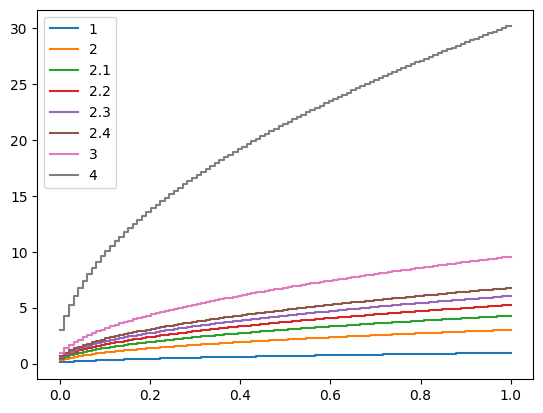

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,1,99
2,100,1000,1,1,100,1000,3.01511,1,99
2.1,200,2000,1,1,200,2000,4.26401,1,99
2.2,300,3000,1,1,300,3000,5.22233,1,99
2.3,400,4000,1,1,400,4000,6.03023,1,99
2.4,500,5000,1,1,500,5000,6.742,1,99
3,1000,10000,1,1,1000,10000,9.53463,1,99
4,10000,100000,1,1,10000,100000,30.1511,1,99


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import tabulate

def compare_significance(scenarios, log=False):
    max_sigs = dict()
    table = []

    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():
        TPR = np.linspace(0, 1, 100)
        FPR = np.linspace(0, 1, 100)

        # Calculate expected number of signal and background events passing the threshold cut
        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        # Calculate significance, handle division by zero
        with np.errstate(divide='ignore', invalid='ignore'):
            sig = np.divide(n_sig_expected_prime, np.sqrt(n_sig_expected_prime + n_bkg_expected_prime))

        # Plot significance as a function of TPR
        plt.step(TPR, sig, label=name)

        # Find maximum significance and store relevant data
        max_i = np.nanargmax(sig)  # Use np.nanargmax to ignore NaN values
        max_sigs[name] = (max_i, n_sig_expected_prime[max_i], n_bkg_expected_prime[max_i], sig[max_i], TPR[max_i])

        # Append data to table
        table.append((name, n_sig_expected, n_bkg_expected, TPR[max_i], FPR[max_i], n_sig_expected_prime[max_i],
                      n_bkg_expected_prime[max_i], sig[max_i], TPR[max_i], max_i))

    # Display plot
    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()

    # Display table
    display(HTML(tabulate.tabulate(table, tablefmt='html',
                                    headers=["Name", 'N sig', 'N bkg', "TPR", "FPR", "N sig'", "N bkg'", 'sig', 'x_c', "bin i"])))

    return max_sigs

# Define scenarios
scenarios = {"1": (10, 100),
             "2": (100, 1000),
             "2.1": (200, 2000),
             "2.2": (300, 3000),
             "2.3": (400, 4000),
             "2.4": (500, 5000),
             "3": (1000, 10000),
             "4": (10000, 100000)}

# Compare significance
max_sigs = compare_significance(scenarios)


## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



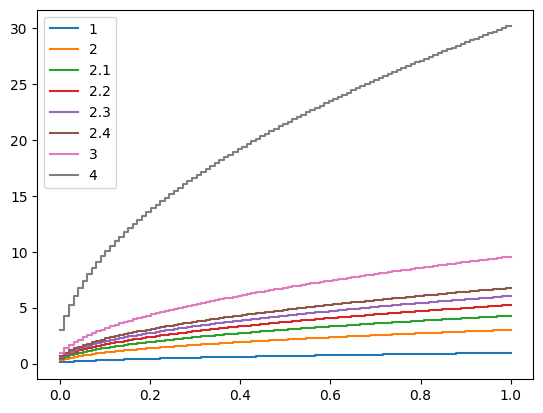

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,1,99
2,100,1000,1,1,100,1000,3.01511,1,99
2.1,200,2000,1,1,200,2000,4.26401,1,99
2.2,300,3000,1,1,300,3000,5.22233,1,99
2.3,400,4000,1,1,400,4000,6.03023,1,99
2.4,500,5000,1,1,500,5000,6.742,1,99
3,1000,10000,1,1,1000,10000,9.53463,1,99
4,10000,100000,1,1,10000,100000,30.1511,1,99


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import tabulate

def compare_significance(scenarios, log=False):
    max_sigs = dict()
    table = []

    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():
        TPR = np.linspace(0, 1, 100)
        FPR = np.linspace(0, 1, 100)

        # Calculate expected number of signal and background events passing the threshold cut
        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        # Calculate significance, handle division by zero or taking square root of negative numbers
        with np.errstate(divide='ignore', invalid='ignore'):
            sig = np.divide(n_sig_expected_prime, np.sqrt(n_sig_expected_prime + n_bkg_expected_prime))

        # Plot significance as a function of TPR
        plt.step(TPR, sig, label=name)

        # Find maximum significance and store relevant data
        max_i = np.nanargmax(sig)
        max_sigs[name] = (max_i, n_sig_expected_prime[max_i], n_bkg_expected_prime[max_i], sig[max_i], TPR[max_i])

        # Append data to table
        table.append((name, n_sig_expected, n_bkg_expected, TPR[max_i], FPR[max_i], n_sig_expected_prime[max_i],
                      n_bkg_expected_prime[max_i], sig[max_i], TPR[max_i], max_i))

    # Display plot
    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()

    # Display table
    display(HTML(tabulate.tabulate(table, tablefmt='html',
                                    headers=["Name", 'N sig', 'N bkg', "TPR", "FPR", "N sig'", "N bkg'", 'sig', 'x_c', "bin i"])))

    return max_sigs

# Define scenarios
scenarios = {"1": (10, 100),
             "2": (100, 1000),
             "2.1": (200, 2000),
             "2.2": (300, 3000),
             "2.3": (400, 4000),
             "2.4": (500, 5000),
             "3": (1000, 10000),
             "4": (10000, 100000)}

# Compare significance
max_sigs = compare_significance(scenarios)


## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$.

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5?

In [33]:
df_sig.shape

(229245, 19)

In [34]:
df_sig

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
8,1.0,2.112812,0.742983,-0.330539,0.805253,-0.028887,-1.446679,2.299946,1.450429,2.989110,-1.894770,1.445125,2.548166,1.564721,2.393632,1.554566,2.148468,1.179117,0.688057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499988,1.0,0.939203,0.496058,0.492828,0.666188,-1.330323,-1.665897,1.501900,0.031668,1.689827,0.799185,1.104025,1.026356,0.824965,1.495351,1.117306,1.287094,1.173716,0.095378
499991,1.0,1.521302,0.734693,0.280339,1.590609,0.366158,-1.507171,0.828265,-0.980382,1.005345,-0.325469,1.318534,1.237360,0.832760,0.671833,1.340157,0.739515,1.115782,0.227649
499994,1.0,0.955334,-1.524135,-1.189764,1.470348,-0.296168,0.696495,0.851731,0.815524,0.259266,0.340013,1.219641,0.991118,0.721126,0.000000,1.242410,0.526798,1.313807,0.160337
499996,1.0,0.910016,-0.364544,-0.777120,0.543648,-0.910632,-1.723707,2.864673,1.458272,2.176558,-0.590911,0.673695,1.662140,2.189362,1.195041,0.910815,1.181893,1.252362,0.826035


In [35]:
df_sig_0 = df_sig.drop("signal",axis=1)
df_bkg_0 = df_bkg.drop("signal",axis=1)

df_sig_0

,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
8,2.112812,0.742983,-0.330539,0.805253,-0.028887,-1.446679,2.299946,1.450429,2.989110,-1.894770,1.445125,2.548166,1.564721,2.393632,1.554566,2.148468,1.179117,0.688057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499988,0.939203,0.496058,0.492828,0.666188,-1.330323,-1.665897,1.501900,0.031668,1.689827,0.799185,1.104025,1.026356,0.824965,1.495351,1.117306,1.287094,1.173716,0.095378
499991,1.521302,0.734693,0.280339,1.590609,0.366158,-1.507171,0.828265,-0.980382,1.005345,-0.325469,1.318534,1.237360,0.832760,0.671833,1.340157,0.739515,1.115782,0.227649
499994,0.955334,-1.524135,-1.189764,1.470348,-0.296168,0.696495,0.851731,0.815524,0.259266,0.340013,1.219641,0.991118,0.721126,0.000000,1.242410,0.526798,1.313807,0.160337
499996,0.910016,-0.364544,-0.777120,0.543648,-0.910632,-1.723707,2.864673,1.458272,2.176558,-0.590911,0.673695,1.662140,2.189362,1.195041,0.910815,1.181893,1.252362,0.826035


In [36]:
m_s= np.mean(df_sig_0,axis=0)
m_s

,0
l_1_pT,1.291078
l_1_eta,0.000824
l_1_phi,-0.001524
l_2_pT,1.138668
l_2_eta,0.002487
l_2_phi,0.000049
MET,1.418381
MET_phi,-0.000470
MET_rel,1.275169
axial_MET,0.089314


In [37]:
# Compute means for signal and background
m_s = np.mean(df_sig_0, axis=0)  # Mean for signal events
m_b = np.mean(df_bkg_0, axis=0)  # Mean for background events

# Calculate the difference between means
delta = m_s - m_b  # Difference vector between signal and background means


In [38]:
delta=np.matrix(m_s-m_b).transpose()

In [39]:
S_B= delta*delta.transpose()
S_B

matrix([[ 2.87970231e-01,  4.58922304e-04,  4.67467434e-04,
          1.38148662e-01,  1.54068049e-03,  3.66095560e-04,
          4.13461344e-01, -6.36618070e-04,  2.71136238e-01,
          8.54657090e-02,  1.82331687e-01,  2.66557653e-01,
          5.53227373e-02,  7.37824064e-02,  1.74241790e-01,
          1.84116478e-01,  1.54056891e-02,  5.66281031e-02],
        [ 4.58922304e-04,  7.31359210e-07,  7.44977113e-07,
          2.20159917e-04,  2.45529768e-06,  5.83426339e-07,
          6.58910580e-04, -1.01454317e-06,  4.32094896e-04,
          1.36201995e-04,  2.90571971e-04,  4.24798257e-04,
          8.81648006e-05,  1.17582959e-04,  2.77679548e-04,
          2.93416294e-04,  2.45511986e-05,  9.02450903e-05],
        [ 4.67467434e-04,  7.44977113e-07,  7.58848582e-07,
          2.24259293e-04,  2.50101531e-06,  5.94289733e-07,
          6.71179491e-04, -1.03343396e-06,  4.40140500e-04,
          1.38738075e-04,  2.95982420e-04,  4.32707998e-04,
          8.98064286e-05,  1.19772353e

In [40]:
df_sig_0-m_s

,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1,0.376895,0.063367,-1.223647,-0.632566,-0.341426,1.672494,2.057083,-1.218666,-1.262214,3.685859,-0.137674,-0.700807,-0.574424,-1.074694,-0.726613,-0.980666,0.307276,0.095167
2,-0.846238,-0.135122,-0.708447,-0.686949,-1.616358,-0.768710,-0.198463,0.504496,0.556079,-0.520699,-0.657368,-0.327344,0.531183,0.949615,-0.571526,0.376352,0.120837,-0.101507
3,-0.909822,-0.976969,0.694677,-0.689709,0.889266,-0.677378,0.614679,1.533511,1.771091,-1.094599,-0.614265,-0.253647,0.525864,0.477221,-0.413808,0.529442,0.477639,-0.191698
4,0.018919,-0.690913,-0.674735,0.450615,-0.695813,0.622858,-0.330819,-0.381271,-0.685964,1.276165,-0.004356,-0.300640,-0.327789,-1.074694,-0.091865,-1.142593,0.140236,-0.187558
8,0.821734,0.742159,-0.329015,-0.333415,-0.031374,-1.446728,0.881564,1.450900,1.713942,-1.984084,0.261474,1.279308,0.508369,1.318939,0.379543,0.962446,0.164500,0.405640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499988,-0.351875,0.495235,0.494352,-0.472480,-1.332810,-1.665947,0.083519,0.032139,0.414658,0.709871,-0.079626,-0.242503,-0.231387,0.420657,-0.057717,0.101072,0.159099,-0.187039
499991,0.230224,0.733870,0.281863,0.451941,0.363671,-1.507220,-0.590116,-0.979911,-0.269824,-0.414783,0.134882,-0.031498,-0.223592,-0.402861,0.165134,-0.446507,0.101164,-0.054768
499994,-0.335744,-1.524958,-1.188240,0.331680,-0.298655,0.696446,-0.566651,0.815994,-1.015903,0.250699,0.035990,-0.277740,-0.335226,-1.074694,0.067386,-0.659224,0.299190,-0.122080
499996,-0.381062,-0.365368,-0.775596,-0.595019,-0.913119,-1.723756,1.446292,1.458742,0.901389,-0.680225,-0.509956,0.393282,1.133010,0.120347,-0.264209,-0.004129,0.237745,0.543618


In [41]:
delta_s=np.matrix(df_sig_0-m_s).transpose()
delta_s.shape

(18, 229245)

In [42]:
S_W_s= delta_s*delta_s.transpose()
S_W_s.shape

(18, 18)

In [43]:
delta_b=np.matrix(df_bkg_0-m_b).transpose()
S_W_b= delta_b*delta_b.transpose()

In [44]:
S_W=S_W_s+S_W_b
S_W_inv = np.linalg.inv(S_W)
w = S_W_inv * np.matrix(m_b - m_s).transpose()

In [45]:
w

matrix([[-2.26832982e-06],
        [-5.63688439e-09],
        [-2.10423856e-09],
        [-9.95582982e-07],
        [-3.48452234e-09],
        [-2.70762588e-09],
        [-1.65185357e-06],
        [-2.74241844e-09],
        [-1.39723282e-07],
        [-2.64205675e-07],
        [ 2.72149250e-07],
        [-1.48465692e-07],
        [ 2.11167032e-06],
        [ 3.24040633e-07],
        [ 1.81173242e-06],
        [-1.69348122e-06],
        [ 7.50902836e-08],
        [-5.06860437e-06]])

In [46]:
w_1 = w / sum(w)
w_1

matrix([[ 2.96426929e-01],
        [ 7.36631998e-04],
        [ 2.74983369e-04],
        [ 1.30103481e-01],
        [ 4.55359819e-04],
        [ 3.53834445e-04],
        [ 2.15865381e-01],
        [ 3.58381161e-04],
        [ 1.82591363e-02],
        [ 3.45265825e-02],
        [-3.55646545e-02],
        [ 1.94016005e-02],
        [-2.75954556e-01],
        [-4.23458567e-02],
        [-2.36758461e-01],
        [ 2.21305311e-01],
        [-9.81285083e-03],
        [ 6.62368767e-01]])

In [47]:
# Compute the output scores for signal and background events using linear coefficients w_1
output_s = np.matrix(df_sig_0) * w_1  # Output scores for signal events
output_b = np.matrix(df_bkg_0) * w_1  # Output scores for background events

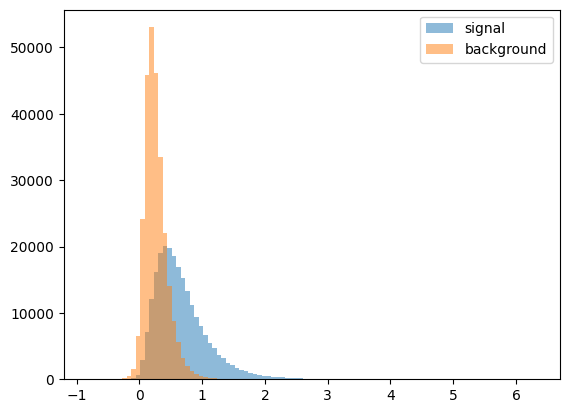

In [48]:
h_s,bins,_=plt.hist(output_s,label="signal",alpha=0.5,bins=100)
h_b,bins,_=plt.hist(output_b,bins=bins,alpha=0.5,label="background")
plt.legend()